# Effects of Averaging the data
Now we look at analyzing the signal to work out the curve.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from src.data_processing import convert_time, create_data_from_entry, load_data, create_rolling_averages

%matplotlib inline
%load_ext autoreload
%autoreload 2

First we import 10 minutes (6000 ms) of data.

In [2]:
data = load_data(6000)

In [3]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,92,93,94,95,96,97,98,99,100,Time
0,4.518552,4.450329,4.418448,4.399958,4.232905,4.364889,4.349268,4.384018,4.372859,4.489223,...,4.583588,4.619294,4.657232,4.733744,4.664564,4.699314,4.683055,4.667433,4.580400,2018-09-21 16:56:48.930999994
1,4.662333,4.594428,4.530986,4.521740,4.437258,4.376048,4.420680,4.308780,4.335241,4.349268,...,4.443634,4.479021,4.523972,4.572749,4.621207,4.601122,4.675722,4.678910,4.640973,2018-09-21 16:56:49.041000128
2,4.574343,4.545651,4.414623,4.446503,4.410478,4.276900,4.364252,4.322807,4.329821,4.408565,...,4.487310,4.581038,4.601760,4.649262,4.719398,4.696445,4.677954,4.710791,4.597616,2018-09-21 16:56:49.367999792
3,4.467225,4.557128,4.540231,4.637466,4.605267,4.711109,4.667433,4.705371,4.678273,4.630452,...,4.495280,4.479658,4.398364,4.403146,4.286783,4.359789,4.301766,4.342573,4.410478,2018-09-21 16:56:49.640000105
4,4.386568,4.472645,4.553302,4.616744,4.628539,4.760205,4.666477,4.698039,4.673172,4.654681,...,4.534811,4.435664,4.408565,4.401552,4.286145,4.342892,4.349268,4.333966,4.378279,2018-09-21 16:56:49.912999868


In [4]:
data.tail()

,1,2,3,4,5,6,7,8,9,10,...,92,93,94,95,96,97,98,99,100,Time
5995,4.596340,4.563185,4.511220,4.437895,4.385293,4.343848,4.356282,4.328865,4.350543,4.406334,...,4.523335,4.484122,4.585820,4.626308,4.689112,4.712385,4.645755,4.695169,4.684330,2018-09-21 17:25:19.827999830
5996,4.387843,4.425462,4.441083,4.535768,4.567967,4.618657,4.665521,4.673491,4.705371,4.667115,...,4.614193,4.567011,4.508351,4.436939,4.413666,4.306867,4.368077,4.360426,4.332690,2018-09-21 17:25:20.099999905
5997,4.332053,4.319938,4.421955,4.443953,4.522697,4.575618,4.625351,4.600166,4.773595,4.627264,...,4.648943,4.631728,4.570517,4.554258,4.446184,4.409522,4.403465,4.369034,4.336835,2018-09-21 17:25:20.373999834
5998,4.668071,4.630452,4.593790,4.568923,4.484122,4.465950,4.406971,4.310055,4.335241,4.347355,...,4.359470,4.401552,4.485397,4.514089,4.579763,4.619294,4.662014,4.765944,4.643204,2018-09-21 17:25:20.702000141
5999,4.345442,4.373178,4.425143,4.479340,4.602716,4.588370,4.659782,4.713979,4.696445,4.668709,...,4.649899,4.598253,4.549158,4.458617,4.461487,4.369990,4.402508,4.305911,4.366802,2018-09-21 17:25:20.973999977


## Averaging effect

The DAQ is sampling at 1000Hz collecting 100 samples before giving the data to the IOC. This happens every 0.1 second so a new sample is taken every 0.001 seconds. At 50Hz, the signal repeats every 1/50 = 0.02 seconds. So a period lasts is 20 samples. Thus to average out the 50Hz we need to average every ten samples.

We create a new data set from the rolling average of two samples 0.01 seconds apart.

Each element (row, col) of this data set is the average of the values (row, col) and (row, col + 10).

In [5]:
rolling_averages = data.apply(create_rolling_averages, axis=1, result_type='expand')

In [6]:
rolling_averages.rename(columns={0: "Time"}, inplace=True)
rolling_averages.head()

,Time,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2018-09-21 16:56:48.930999994,4.496874,4.515364,4.499743,4.523972,4.492729,4.514249,4.514408,4.555534,4.505482,...,4.503728,4.519349,4.521262,4.539912,4.510264,4.506597,4.530189,4.520784,4.516002,4.493367
1,2018-09-21 16:56:49.041000128,4.509148,4.505482,4.497033,4.525407,4.499584,4.516002,4.516640,4.506438,4.513611,...,4.506119,4.510264,4.519987,4.505641,4.508191,4.502612,4.521103,4.484122,4.522219,4.498308
2,2018-09-21 16:56:49.367999792,4.505482,4.517277,4.500699,4.527479,4.529392,4.522856,4.516321,4.506438,4.510423,...,4.494961,4.505641,4.512017,4.508510,4.532261,4.497352,4.528754,4.489223,4.527001,4.507076
3,2018-09-21 16:56:49.640000105,4.515046,4.540550,4.509148,4.520465,4.498468,4.492411,4.514727,4.506438,4.505960,...,4.519987,4.485716,4.526682,4.490657,4.506279,4.481253,4.524769,4.496714,4.521103,4.504844
4,2018-09-21 16:56:49.912999868,4.491454,4.507076,4.491773,4.519987,4.505482,4.505322,4.527798,4.508191,4.511858,...,4.513770,4.509945,4.506757,4.505960,4.527001,4.501656,4.510264,4.498308,4.515683,4.501497


Lets look at how this averaging process affects the mean and standard deviation of the signal.

First we flattern the non-averaged data and look at the mean and standard deviation

In [7]:
flattened_data = data.iloc[:,0:100].values.flatten()
flattened_data

array([ 4.51855246,  4.45032862,  4.41844832, ...,  4.40250817,
        4.30591086,  4.36680223])

In [8]:
data_mean = np.mean(flattened_data)
data_mean

4.5120625957677358

In [9]:
data_std = np.std(flattened_data)
data_std

0.13123137235153848

Now we flattern the averaged data and look at the mean and standard deviation

In [10]:
rolling_average_data = rolling_averages.drop("Time", 1).values.flatten()
rolling_average_data

array([ 4.49687386,  4.51536443,  4.49974308, ...,  4.51488623,
        4.51536443,  4.50978538])

In [11]:
rolling_mean = np.mean(rolling_average_data)
rolling_mean

4.5120743899437619

In [12]:
rolling_std = np.std(rolling_average_data)
rolling_std

0.013641656314979319

Lets look at the differences between the rolling average mean and standard deviation and the orginal data

In [13]:
data_mean - rolling_mean

-1.1794176026036496e-05

In [14]:
rolling_std/data_std

0.103951182331893

## Conclusion

By averaging the samples using a rolling average to cancel the 50Hz signal we reduce the standard deviation of the signal by 89.6%. Over 0.1 seconds of data (one row or array of data from the DAQ), this can be visualized by the charts below.

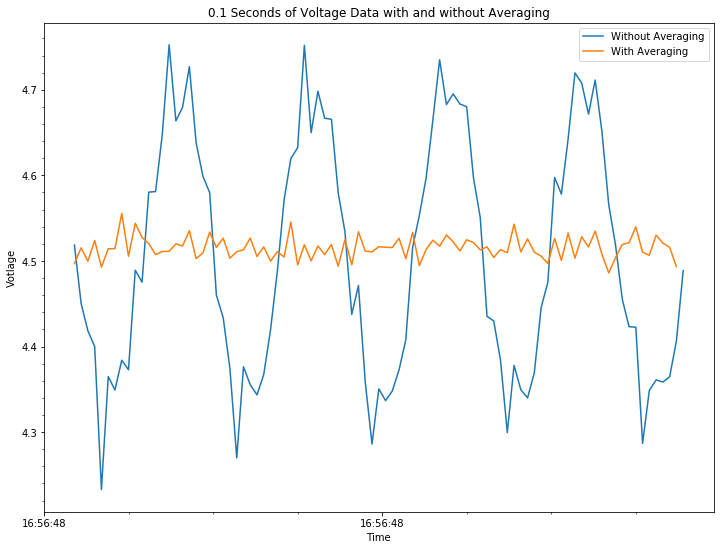

In [20]:
row_of_data = create_data_from_entry(0, data)
row_of_averaged_data = create_data_from_entry(0, rolling_averages)

fig = plt.figure(figsize=(12,9))
axis = fig.add_subplot(111)
axis.plot(row_of_data.loc[:90,"Time"], row_of_data.loc[:90, "Value"])
axis.plot(row_of_averaged_data["Time"], row_of_averaged_data["Value"])

axis.xaxis_date()
axis.minorticks_on()
axis.legend(["Without Averaging", "With Averaging"])

axis.set_title("0.1 Seconds of Voltage Data with and without Averaging")
axis.set_xlabel("Time")
axis.set_ylabel("Votlage")
fig.savefig("voltage_data_comparison.png")

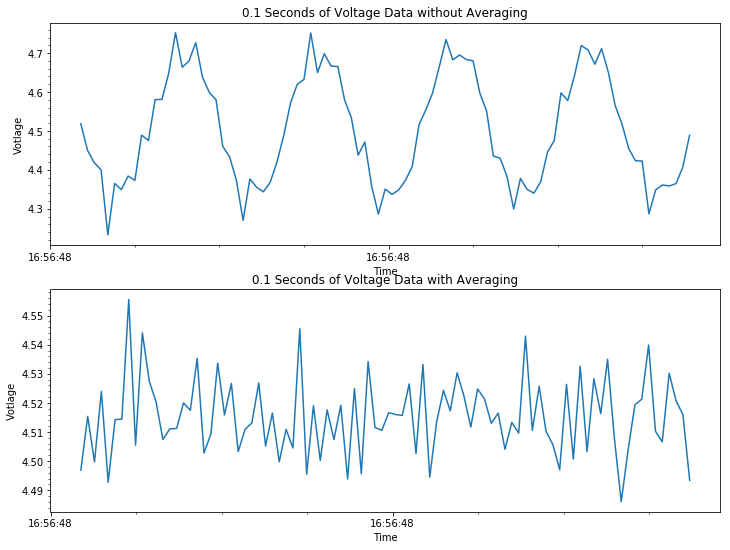

In [21]:
fig = plt.figure(figsize=(12,9))

axis1 = fig.add_subplot(211)
axis1.plot(row_of_data.loc[:90,"Time"], row_of_data.loc[:90, "Value"])
axis1.xaxis_date()
axis1.minorticks_on()
axis1.set_title("0.1 Seconds of Voltage Data without Averaging")
axis1.set_xlabel("Time")
axis1.set_ylabel("Votlage")

axis2 = fig.add_subplot(212)
axis2.plot(row_of_averaged_data["Time"], row_of_averaged_data["Value"])
axis2.xaxis_date()
axis2.minorticks_on()
axis2.set_title("0.1 Seconds of Voltage Data with Averaging")
axis2.set_xlabel("Time")
axis2.set_ylabel("Votlage")

fig.savefig("voltage_data_faceted.png")